In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
f8 = pd.read_csv('at_cluster_ms (8).txt', sep=' ', header=0)
f16 = pd.read_csv('at_cluster_ms (16).txt', sep=' ', header=0)
f32 = pd.read_csv('at_cluster_ms (32).txt', sep=' ', header=0)
f64 = pd.read_csv('at_cluster_ms (64).txt', sep=' ', header=0)
f128 = pd.read_csv('at_cluster_ms (128).txt', sep=' ', header=0)
g8 = pd.read_csv('at_met_ms (8).txt', sep=' ', header=0)
g16 = pd.read_csv('at_met_ms (16).txt', sep=' ', header=0)
g32 = pd.read_csv('at_met_ms (32).txt', sep=' ', header=0)
g64 = pd.read_csv('at_met_ms (64).txt', sep=' ', header=0)
g128 = pd.read_csv('at_met_ms (128).txt', sep=' ', header=0)

In [4]:
c_trial=int(len(f8.magsus)/50000)
m_trial=int(len(g8.magsus)/250000)
print(c_trial, m_trial)

20 20


# I. Magnetization autocorrelation time
### a. cluster model at critical

In [18]:
start1=0
m_c_8=np.zeros((c_trial,50000-start1))
m_c_16=np.zeros((c_trial,50000-start1))
m_c_32=np.zeros((c_trial,50000-start1))
m_c_64=np.zeros((c_trial,50000-start1))
m_c_128=np.zeros((c_trial,50000-start1))
for i in range (c_trial):
    m_c_8[i]=np.array(f8.magsus[start1+50000*i:50000+50000*i])
    m_c_16[i]=np.array(f16.magsus[start1+50000*i:50000+50000*i])
    m_c_32[i]=np.array(f32.magsus[start1+50000*i:50000+50000*i])
    m_c_64[i]=np.array(f64.magsus[start1+50000*i:50000+50000*i])
    m_c_128[i]=np.array(f128.magsus[start1+50000*i:50000+50000*i])

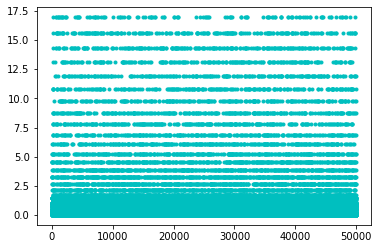

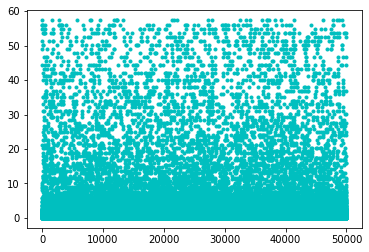

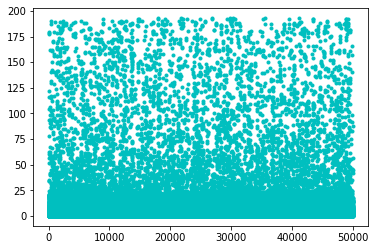

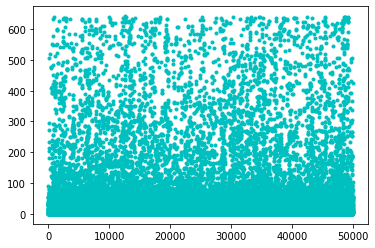

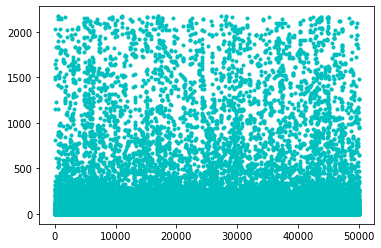

In [19]:
t=np.arange(len(m_c_8[0]))
ith=3
plt.plot(t, m_c_8[ith], 'c.')
plt.show()
plt.plot(t, m_c_16[ith], 'c.')
plt.show()
plt.plot(t, m_c_32[ith], 'c.')
plt.show()
plt.plot(t, m_c_64[ith], 'c.')
plt.show()
plt.plot(t, m_c_128[ith], 'c.')
plt.show()

### b. metropolis model at critical

In [11]:
start2=0
m_m_8=np.zeros((m_trial,200000-start2))
m_m_16=np.zeros((m_trial,200000-start2))
m_m_32=np.zeros((m_trial,200000-start2))
m_m_64=np.zeros((m_trial,250000-start2))
m_m_128=np.zeros((m_trial,250000-start2))
for i in range (m_trial):
    m_m_8[i]=np.array(g8.magsus[start2+200000*i:200000+200000*i])
    m_m_16[i]=np.array(g16.magsus[start2+200000*i:200000+200000*i])
    m_m_32[i]=np.array(g32.magsus[start2+200000*i:200000+200000*i])
    m_m_64[i]=np.array(g64.magsus[start2+200000*i:250000+200000*i])
    m_m_128[i]=np.array(g128.magsus[start2+200000*i:250000+200000*i])

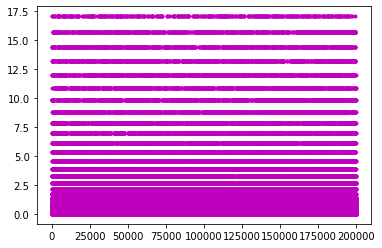

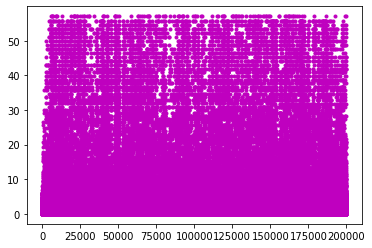

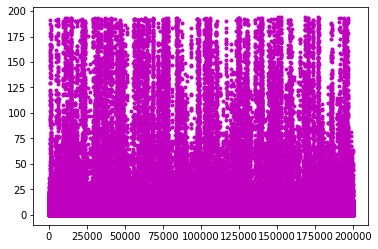

"plt.plot(t2, m_m_64[ith], 'm.')\nplt.show()\nplt.plot(t2, m_m_128[ith], 'm.')\nplt.show()"

In [12]:
t2=np.arange(len(m_m_8[0]))
plt.plot(t2, m_m_8[ith], 'm.')
plt.show()
plt.plot(t2, m_m_16[ith], 'm.')
plt.show()
plt.plot(t2, m_m_32[ith], 'm.')
plt.show()
"""plt.plot(t2, m_m_64[ith], 'm.')
plt.show()
plt.plot(t2, m_m_128[ith], 'm.')
plt.show()"""

## 1. Autocorrelation calculation: function & windowing

In [13]:
def old_attime(yy, n):
    c_0=np.var(yy)
    inside=0
    for i in range(1, n):
        iinside =0
        for j in range (1, n-i):
            iinside = iinside + (yy[i]-np.mean(yy))*(yy[i+j]-np.mean(yy))
        inside = inside + 1/(n-i) * iinside
    return 1+2*inside/c_0

def next_pow_2(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x):
    x = np.atleast_1d(x)
    nn = next_pow_2(len(x))
    f = np.fft.fft(x-np.mean(x), n=nn*2)
    acf = np.real(np.fft.ifft(f * np.conjugate(f))[:len(x)])/(4*nn)
    acf = acf / (len(x)-np.arange(len(x)))
    acf = acf/acf[0]
    return acf

def autocorr_time(yy):
    #c_0 = np.var(yy)
    A = autocorr_func_1d(yy)
    return -1+2*np.sum(A[:100])

def auto_window(taus):
    m = np.arange(len(taus)) < 5 * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1
def autocorr_gw2010(y):
    f = autocorr_func_1d(y)
    taus = -1+2*np.cumsum(f)
    window = auto_window(taus)
    return taus[window]

## [WARNING] Don't touch these...
This takes enormous time to calculate, and this cell will set my efforts to ZERO... Just import all datas I calculated.

In [15]:
c8=np.zeros((c_trial, len(m_c_8[0])))
c16=np.zeros((c_trial, len(m_c_16[0])))
c32=np.zeros((c_trial, len(m_c_32[0])))
#c64=np.zeros((c_trial, len(m_c_64[0])))
#c128=np.zeros((c_trial, len(m_c_128[0])))
for i in range (c_trial):
    for j in range (1, len(m_c_32[0])):
        c8[i][j]=autocorr_gw2010(m_c_8[i][:j])
        #c16[i][j]=autocorr_gw2010(m_c_16[i][:j])
        #c32[i][j]=autocorr_gw2010(m_c_32[i][:j])
        #c64[i][j]=autocorr_gw2010(m_c_64[i][:j])
        #c128[i][j]=autocorr_gw2010(m_c_128[i][:j])

/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less


In [ ]:
m8=np.zeros((m_trial, len(m_m_8[0])))
m16=np.zeros((m_trial, len(m_m_16[0])))
m32=np.zeros((m_trial, len(m_m_32[0])))
#m64=np.zeros((m_trial, len(m_m_64[0])))
#m128=np.zeros((m_trial, len(m_m_128[0])))
for i in range (m_trial):
    for j in range (1, len(m_m_32[0])):
        m8[i][j]=autocorr_gw2010(m_m_8[i][:j])
        m16[i][j]=autocorr_gw2010(m_m_16[i][:j])
        m32[i][j]=autocorr_gw2010(m_m_32[i][:j])
        #m64[i][j]=autocorr_gw2010(m_m_64[i][:j])
        #m128[i][j]=autocorr_gw2010(m_m_128[i][:j])
    print(i)

Divide by 2 when it is needed.

In [ ]:
c8=c8/2
c16=c16/2
c32=c32/2
c64=c64/2
c128=c128/2
m8=m8/2
m16=m16/2
m32=m32/2
m64=m64/2
m128=m128/2

#### +save results above
Just import these.

In [16]:
np.savetxt("c8_ms.txt", c8)
np.savetxt("c16_ms.txt", c16)
np.savetxt("c32_ms.txt", c32)
np.savetxt("c64_ms.txt", c64)
np.savetxt("c128_ms.txt", c128)
np.savetxt("m8_ms.txt", m8)
np.savetxt("m16_ms.txt", m16)
np.savetxt("m32_ms.txt", m32)
np.savetxt("m64_ms.txt", m64)
np.savetxt("m128_ms.txt", m128)

## 2. Plot!
### a. cluster model

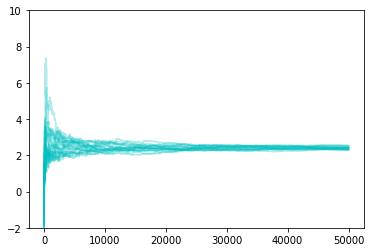

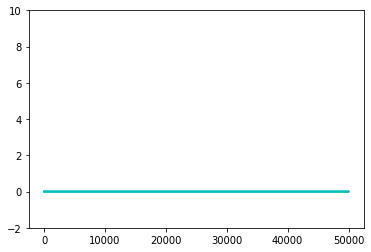

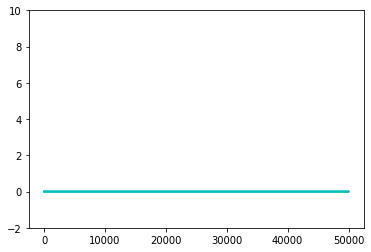

"for k in range (c_trial):\n    plt.plot(t, c64[k], 'c-', alpha=0.3)\nplt.ylim(-2,  10)\nplt.show()\nfor k in range (c_trial):\n    plt.plot(t, c128[k], 'c-', alpha=0.3)\nplt.ylim(-2,  10)\nplt.show()"

In [16]:
for k in range (c_trial):
    plt.plot(t, c8[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
for k in range (c_trial):
    plt.plot(t, c16[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
for k in range (c_trial):
    plt.plot(t, c32[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
"""for k in range (c_trial):
    plt.plot(t, c64[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
for k in range (c_trial):
    plt.plot(t, c128[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()"""

### b. metropolis model

In [ ]:
for k in range (m_trial):
    plt.plot(t2, m8[k], 'm-', alpha=0.3)
plt.show()
for k in range (m_trial):
    plt.plot(t2, m16[k], 'm-', alpha=0.3)
plt.show()
for k in range (m_trial):
    plt.plot(t2, m32[k], 'm-', alpha=0.3)
plt.show()
"""for k in range (m_trial):
    plt.plot(t2, m64[k], 'm-', alpha=0.3)
plt.show()
for k in range (m_trial):
    plt.plot(t2, m128[k], 'm-', alpha=0.3)
plt.show()"""

## 3. Compare autocorrelation time: metropolis vs cluster
### a. cluster model

In [53]:
c8_avg=np.zeros(10000)
c8_std=np.zeros(10000)
c16_avg=np.zeros(10000)
c16_std=np.zeros(10000)
c32_avg=np.zeros(10000)
c32_std=np.zeros(10000)
c64_avg=np.zeros(10000)
c64_std=np.zeros(10000)
c128_avg=np.zeros(10000)
c128_std=np.zeros(10000)
for i in range (10000):
    c8_avg[i]=np.average(c8[:, i])
    c8_std[i]=np.std(c8[:, i])
    c16_avg[i]=np.average(c16[:, i])
    c16_std[i]=np.std(c16[:, i])
    c32_avg[i]=np.average(c32[:, i])
    c32_std[i]=np.std(c32[:, i])
    c64_avg[i]=np.average(c64[:, i])
    c64_std[i]=np.std(c64[:, i])
    c128_avg[i]=np.average(c128[:, i])
    c128_std[i]=np.std(c128[:, i])

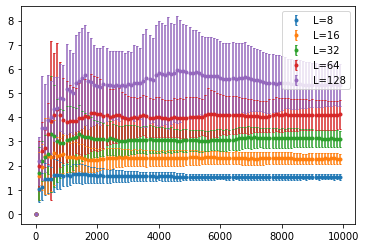

In [108]:
plt.errorbar(t[t%100==0], c8_avg[t%100==0], yerr=c8_std[t%100==0], marker=".", linestyle="", capsize=1, label='L=8')
plt.errorbar(t[t%100==0], c16_avg[t%100==0], yerr=c16_std[t%100==0], marker=".", linestyle="", capsize=1, label='L=16')
plt.errorbar(t[t%100==0], c32_avg[t%100==0], yerr=c32_std[t%100==0], marker=".", linestyle="", capsize=1, label='L=32')
plt.errorbar(t[t%100==0], c64_avg[t%100==0], yerr=c64_std[t%100==0], marker=".", linestyle="", capsize=1, label='L=64')
plt.errorbar(t[t%100==0], c128_avg[t%100==0], yerr=c128_std[t%100==0], marker=".", linestyle="", capsize=1, label='L=128')
plt.legend()
plt.show()

### b. metropolis model

In [60]:
m8_avg=np.zeros(100000)
m8_std=np.zeros(100000)
m16_avg=np.zeros(100000)
m16_std=np.zeros(100000)
m32_avg=np.zeros(100000)
m32_std=np.zeros(100000)
m64_avg=np.zeros(100000)
m64_std=np.zeros(100000)
m128_avg=np.zeros(100000)
m128_std=np.zeros(100000)
for i in range (100000):
    m8_avg[i]=np.average(m8[:, i])
    m8_std[i]=np.std(m8[:, i])
    m16_avg[i]=np.average(m16[:, i])
    m16_std[i]=np.std(m16[:, i])
    m32_avg[i]=np.average(m32[:, i])
    m32_std[i]=np.std(m32[:, i])
    m64_avg[i]=np.average(m64[:, i])
    m64_std[i]=np.std(m64[:, i])
    m128_avg[i]=np.average(m128[:, i])
    m128_std[i]=np.std(m128[:, i])

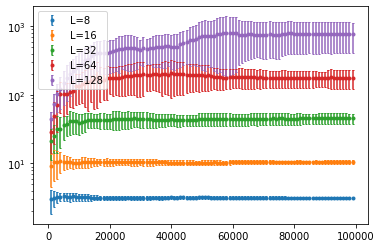

In [109]:
plt.errorbar(t2[t2%1000==0], m8_avg[t2%1000==0], yerr=m8_std[t2%1000==0], marker=".", linestyle="", capsize=1, label='L=8')
plt.errorbar(t2[t2%1000==0], m16_avg[t2%1000==0], yerr=m16_std[t2%1000==0], marker=".", linestyle="", capsize=1, label='L=16')
plt.errorbar(t2[t2%1000==0], m32_avg[t2%1000==0], yerr=m32_std[t2%1000==0], marker=".", linestyle="", capsize=1, label='L=32')
plt.errorbar(t2[t2%1000==0], m64_avg[t2%1000==0], yerr=m64_std[t2%1000==0], marker=".", linestyle="", capsize=1, label='L=64')
plt.errorbar(t2[t2%1000==0], m128_avg[t2%1000==0], yerr=m128_std[t2%1000==0], marker=".", linestyle="", capsize=1, label='L=128')
plt.legend()
plt.yscale('log')
plt.show()

### c. compare

cluster = 0.4447917290521159
metropolis = 2.001187001960499


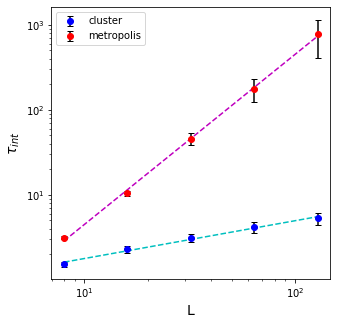

In [107]:
L=np.array([8*2**i for i in range (5)])
c_avg=np.array([c8_avg[-1], c16_avg[-1], c32_avg[-1], c64_avg[-1], c128_avg[-1]])
m_avg=np.array([m8_avg[-1], m16_avg[-1], m32_avg[-1], m64_avg[-1], m128_avg[-1]])
c_std=np.array([c8_std[-1], c16_std[-1], c32_std[-1], c64_std[-1], c128_std[-1]])
m_std=np.array([m8_std[-1], m16_std[-1], m32_std[-1], m64_std[-1], m128_std[-1]])
z1=np.polyfit(np.log(L), np.log(c_avg), 1)
z2=np.polyfit(np.log(L), np.log(m_avg), 1)
print("cluster =", z1[0])
print("metropolis =", z2[0])

plt.figure(figsize=(5, 5))
plt.errorbar(L, c_avg, yerr=c_std, fmt='bo', linestyle='', ecolor='k', capsize=3, label='cluster')
plt.errorbar(L, m_avg, yerr=m_std, fmt='ro', linestyle='', ecolor='k', capsize=3, label='metropolis')
plt.plot(L, np.exp(np.poly1d(z1)(np.log(L))), 'c--')
plt.plot(L, np.exp(np.poly1d(z2)(np.log(L))), 'm--')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$\\tau_{int}$', fontsize=14)
plt.xlabel('L', fontsize=14)
plt.legend()

plt.show()

# 2. Magnetic susceptibility autocorrelation time